   # Communities and Crime Data Set

   URL : http://archive.ics.uci.edu/ml/datasets/communities+and+crime

   The dataset contains:
       1. economic data from the 1990 US Census
       2. law enforcement data from the 1990 Law Enforcement Management and Administrative Statistics (LEMAS) survey
       3. and crime data from the 1995 Federal Bureau of Investigation's (FBI) Uiniform Crime Report (UCR) 

   Number of Instances: 1994

   Attribute Characteristics: numeric, categorical

   Number of Attributes: 128

   Missing Values: Yes 

   The target variable is the **ViolentCrimesPerPop**.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import time

In [3]:
attrib = pd.read_csv('C:/Users/USER/Documents/Machine Learning/184.702-2020S_20200331_1040/Exercise 1/Communities/attributes.csv', delim_whitespace = True)

In [4]:
data = pd.read_csv('C:/Users/USER/Documents/Machine Learning/184.702-2020S_20200331_1040/Exercise 1/Communities/communities.data', names = attrib['attributes'])

In [5]:
print(data.shape)

(1994, 128)


In [6]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


   Above we can see that we have many missing values, identified with '?'.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


   We have 100 float atributes, 2 int attributes, and 26 of type object.
   
   
   

In [8]:
data["fold"].value_counts().sort_values()

10    199
9     199
8     199
7     199
6     199
5     199
4     200
3     200
2     200
1     200
Name: fold, dtype: int64

In [9]:
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.nunique()

state                    46
county                  109
community               800
communityname          1828
fold                     10
                       ... 
LemasPctPolicOnPatr      73
LemasGangUnitDeploy       4
LemasPctOfficDrugUn      80
PolicBudgPerPop          52
ViolentCrimesPerPop      98
Length: 128, dtype: int64

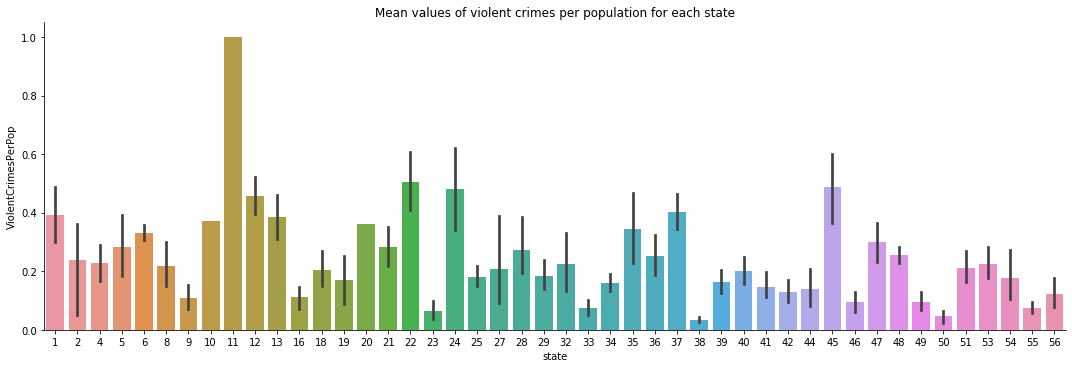

In [11]:

sns.catplot(x="state", y="ViolentCrimesPerPop", kind="bar", data=data, height=5, aspect=3)
plt.title("Mean values of violent crimes per population for each state")
plt.show()

In [12]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Missing values:')
print(data.isna().sum().sort_values(ascending = False))
print(data.isna().sum().sum())

Number of instances = 1994
Number of attributes = 128
Missing values:
LemasSwFTFieldOps    1675
PctPolicAsian        1675
PolicBudgPerPop      1675
LemasSwornFT         1675
LemasSwFTPerPop      1675
                     ... 
PctHousLess3BR          0
MedNumBR                0
HousVacant              0
PctHousOccup            0
state                   0
Length: 128, dtype: int64
39202


   A lot of columns contain missing values, in some of them the number of missing values is significant. In total we have **39202** missing values

________________________________________________________________________________________________________________________________




   The features below are non-predictive, thus will be removed.
       1. state: US state (by number) - not counted as predictive above
       2. county: numeric code for county - not predictive, and many missing values
       3. community: numeric code for community - not predictive and many missing values
       4. communityname: community name - not predictive - for information only
       5.fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive

In [13]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(100), object(23)
memory usage: 1.9+ MB
None
(1994, 123)


   Number of columns after removing the non-predictive columns is 123.

In [14]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
missing_val_cols = data.columns[data.isna().any()]

In [16]:
print(missing_val_cols)
print(len(missing_val_cols))

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
23


   **We  have 23 columns with missing values.**

In [17]:
data[missing_val_cols[0:11]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite
count,1993,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.92
freq,129,80,19,81,17,55,23,15,19,12,11


   The column OtherPerCap contains only one missing value, while all the other columns in the tables above and below contain about 85% missing values.

In [18]:
data[missing_val_cols[11:]].describe()

,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319,319,319
unique,73,54,50,72,30,15,77,63,38,72,3,51
top,0,0,0,0.07,0.03,0.57,0.19,0.02,0.02,0.84,0,0.12
freq,23,72,189,14,48,54,12,27,69,13,126,22


In [19]:
data["OtherPerCap"] = data["OtherPerCap"].astype(float)
data["OtherPerCap"] = data["OtherPerCap"].fillna(data["OtherPerCap"].mean())
data["OtherPerCap"].isna().sum()

0

We replaced the missing value in OtherPerCap column with the mean value of the whole column. 

In [20]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


   We removed the other columns containing ~85% missing values. Now we have 101 columns to work with.

In [21]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [22]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


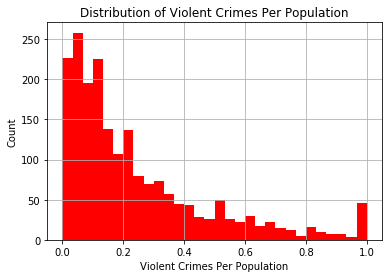

In [23]:
data.hist('ViolentCrimesPerPop', bins = 30, color = 'red')
plt.xlabel('Violent Crimes Per Population')
plt.ylabel('Count')
plt.title('Distribution of Violent Crimes Per Population')
plt.show()


From the histogram above we can see that in most of instances we have low rate of violent crimes per population.

In [24]:
X = data.iloc[:, 0:100]
y = data.iloc[:, 100]
print(X.shape)
print(data.shape)

(1994, 100)
(1994, 101)


   We split the target variable from the predictive features

_______________________________________________________________________________________________________________________________

   Below are calculated the features than have a abs(correlation) over 0.95 with each other. Those were removed for one of the      train/test splits. 

In [25]:
print('\nPearson correlation coefficients: \n')
n = len(X.columns)
for i in range(n-1):
    for j in range(i+1,n):
        if X[X.columns[i]].dtype in ['int64','float64'] and X[X.columns[j]].dtype in ['int64','float64']:
            c = np.corrcoef(X[X.columns[i]],X[X.columns[j]])
            if abs(c[0,1])>=0.95:
                print(str(X.columns[i])+' and '+str(X.columns[j]) + ":" + str(c[0,1]))


Pearson correlation coefficients: 

population and numbUrban:0.9931124252124205
medIncome and medFamInc:0.9776158180285817
perCapInc and whitePerCap:0.970246524302493
PctBSorMore and PctOccupMgmtProf:0.9528190785483248
MalePctDivorce and TotalPctDiv:0.9757255165940257
FemalePctDiv and TotalPctDiv:0.9832167990625805
PctFam2Par and PctKids2Par:0.9853580281880358
PctRecentImmig and PctRecImmig5:0.9889985367936049
PctRecentImmig and PctRecImmig8:0.9779642110638672
PctRecentImmig and PctRecImmig10:0.966459851939328
PctRecImmig5 and PctRecImmig8:0.993433179163211
PctRecImmig5 and PctRecImmig10:0.9856157014348617
PctRecImmig8 and PctRecImmig10:0.9955254221262789
PctRecImmig10 and PctForeignBorn:0.9552285628915753
PctLargHouseFam and PctLargHouseOccup:0.9844025957909803
PctPersOwnOccup and PctHousOwnOcc:0.9818985170148146
OwnOccLowQuart and OwnOccMedVal:0.9944813249906325
OwnOccLowQuart and OwnOccHiQuart:0.9762368033086204
OwnOccMedVal and OwnOccHiQuart:0.9913024852609565
RentLowQ and RentMed

In [26]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

X_remove_high_corr = trimm_correlated(X, 0.95)

In [27]:
X_remove_high_corr.shape

(1994, 83)

   After removing the highly correlated features, the number of features is 83.

In [28]:
abs(data[data.columns[:]].corr()["ViolentCrimesPerPop"][:]).sort_values(ascending=False).head(11)

ViolentCrimesPerPop    1.000000
PctKids2Par            0.738424
PctIlleg               0.737957
PctFam2Par             0.706667
racePctWhite           0.684770
PctYoungKids2Par       0.666059
PctTeen2Par            0.661582
racepctblack           0.631264
pctWInvInc             0.576324
pctWPubAsst            0.574665
FemalePctDiv           0.556032
Name: ViolentCrimesPerPop, dtype: float64

   We have displayed top 10 highest correlated features with the target variable.

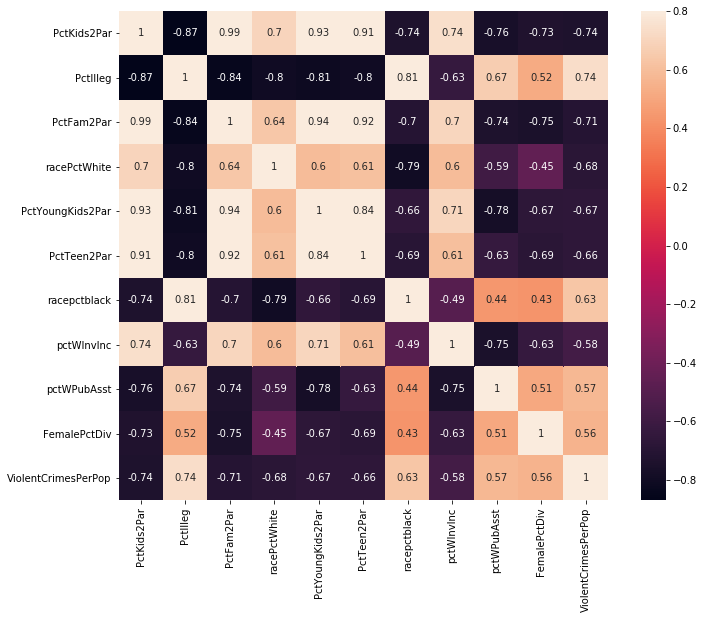

In [29]:
correlation_matrix = data[['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par', 'PctTeen2Par', 'racepctblack', 'pctWInvInc', 'pctWPubAsst', 'FemalePctDiv', 'ViolentCrimesPerPop']].corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()

In [30]:
X_train_rm_c, X_test_rm_c, y_train_rm_c, y_test_rm_c = train_test_split(X_remove_high_corr, y, test_size = 0.3, random_state = 1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

   For testing regression techniques, we will use two train/test splits of data. One of them will contain the 83 numeric   features,  with those highly correlated removed, which we will call rm_c. For the other split, we will apply PCA to all numeric features and choose the most significant features to work with.  

Amount of variance: [1.09363875 0.74189532 0.34108552 0.28889129 0.18039857 0.16067392
 0.13430204 0.10579652 0.08324632 0.07527186 0.05702569 0.054123
 0.0521386  0.04851402 0.04336493 0.03587478 0.03465813 0.03032941
 0.02819826 0.02528124 0.02477528 0.02421796 0.02333461 0.02160268
 0.01958612 0.01736686 0.01627961 0.01566239 0.01496626 0.01428316
 0.01354519 0.01311972 0.01249412]
Sum of the variance: 3.85
Percentage of variance: [0.27137108 0.18409089 0.08463558 0.07168431 0.04476337 0.03986897
 0.03332516 0.02625192 0.0206564  0.01867765 0.01415012 0.01342986
 0.01293746 0.01203807 0.0107604  0.00890182 0.00859993 0.00752582
 0.006997   0.00627318 0.00614764 0.00600935 0.00579015 0.0053604
 0.00486002 0.00430934 0.00403956 0.0038864  0.00371367 0.00354417
 0.00336105 0.00325547 0.00310024]
Sum of the percentage of variance: 0.95


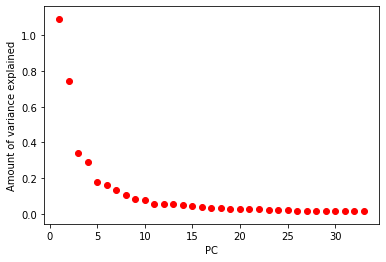

(1395, 33)


In [31]:
#try different number of n_components until sum of the percentage of variance is >=95%
c = 33
pca = PCA(n_components = c)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))



plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train_pca.shape)

   Tried different numbers of n_components until the sum of the percentage of variance was >=0.95, so they would contain most meaningful information.

In [32]:
X_train_pca

array([[ 0.70657144,  0.0498758 , -0.32165421, ..., -0.00943063,
         0.01996357, -0.06843749],
       [-0.39004002, -0.41161265, -0.4038197 , ..., -0.11062482,
        -0.059481  , -0.02271153],
       [ 0.3446443 , -1.03472462,  0.73282271, ...,  0.05770901,
        -0.21207334,  0.03010602],
       ...,
       [ 2.13885785,  0.11639912, -0.10256462, ...,  0.33790245,
        -0.11350433,  0.05547097],
       [-0.33848025,  2.68915317,  0.39211995, ...,  0.01785547,
         0.04731624, -0.02523226],
       [ 1.26744501,  0.97130703, -0.11262632, ..., -0.00660228,
         0.11248535,  0.07924004]])

In [33]:
X_train_rm_c.shape

(1395, 83)

In [34]:
lin_regression = LinearRegression()

First regression technique we will test is Linear regression. We will test it with both PCA and rm_c data splits.

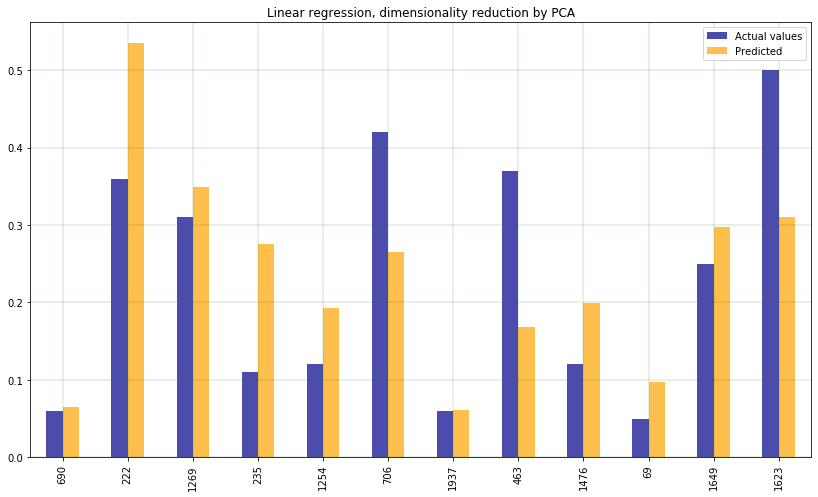

,Predicted pca
Coefficient of determination,0.601974
Mean Squared Error,0.018923
Root Mean Squared Error,0.137560
Residual sum of squares,0.018923


In [35]:
#pca
predicted_vs_actual = pd.DataFrame({'Actual values': y_test}).head(12)
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])

lin_regression.fit(X_train_pca, y_train)
y_pred = lin_regression.predict(X_test_pca)
results["Predicted pca"] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                    np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
predicted_vs_actual["Predicted"] = y_pred[:12]
predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.7, color=["darkblue", "orange", "indigo", "gold", "blue"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.title("Linear regression, dimensionality reduction by PCA")

plt.show()
results

The coefficient of determination is 0.60, and the RMSE is 0.13. Not a bad result.

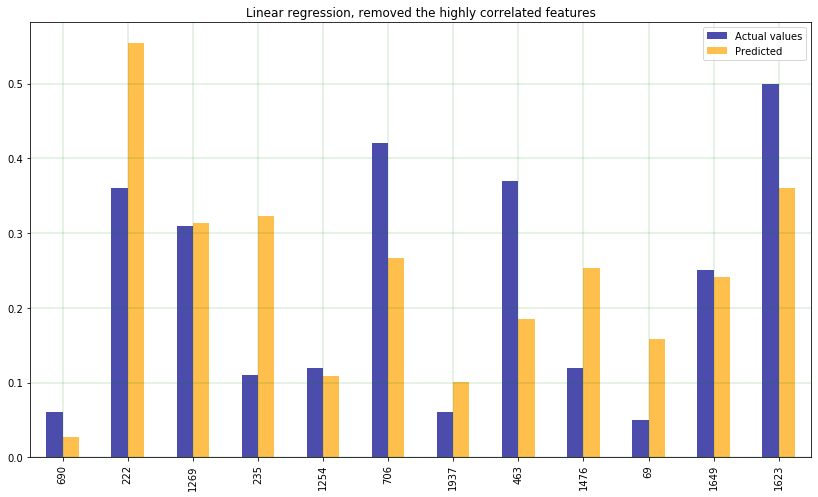

,Predicted rm. corr.
Coefficient of determination,0.624056
Mean Squared Error,0.017873
Root Mean Squared Error,0.133690
Residual sum of squares,0.017873


In [36]:
#X_train_rm_c
predicted_vs_actual = pd.DataFrame({'Actual values': y_test_rm_c}).head(12)
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])

lin_regression.fit(X_train_rm_c, y_train_rm_c)
y_pred = lin_regression.predict(X_test_rm_c)
results["Predicted rm. corr."] = [r2_score(y_test_rm_c, y_pred), mean_squared_error(y_test_rm_c, y_pred), 
                    np.sqrt(mean_squared_error(y_test_rm_c, y_pred)), np.mean((y_pred-y_test_rm_c)**2)]
predicted_vs_actual["Predicted"] = y_pred[:12]
predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.7, color=["darkblue", "orange", "indigo", "gold", "blue"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.title("Linear regression, removed the highly correlated features")

plt.show()
results


The coefficient of determination for this data split performed somewhat better, with coefficient of determination 0.62 and RMSE 0.13.

_______________________________________________________________________________________________________________________________

Below we tested Support Vector Regression technique for the two data splits, experimented with different values for C and degree parameters. 

In [37]:
svr_rbf1 = SVR(kernel='rbf', C = 1e9, cache_size = 500 )
svr_rbf2 = SVR(kernel='rbf', C = 1e6, cache_size = 500 )
svr_rbf3 = SVR(kernel='rbf')

svr_poly1 = SVR(kernel='poly')
svr_poly2 = SVR(kernel='poly', degree = 5)
svr_poly3 = SVR(kernel='poly', degree = 7)


svr_second =  [("Degree = 3", svr_poly1, 1),
               ("Degree = 5", svr_poly2, 2),
               ("Degree = 7", svr_poly3, 3)]

svr_third =  [("C=10^9", svr_rbf1, 1),
              ("C=10^6", svr_rbf2, 2),
              ("C=1", svr_rbf3, 3)]
colors = {1: "blue", 2: "red", 3: "green"}

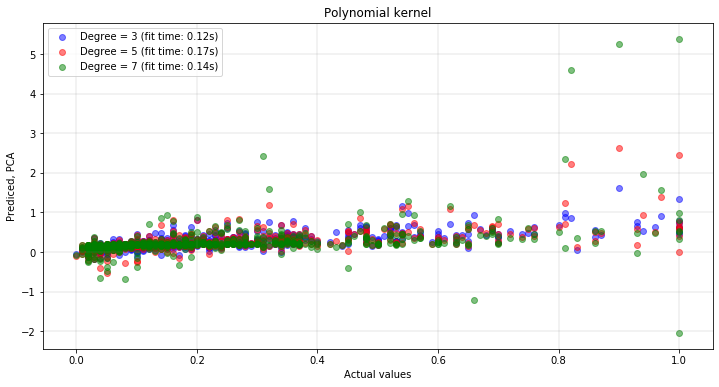

,Degree = 3,Degree = 5,Degree = 7
Coefficient of determination,0.482025,0.080249,-2.439525
Mean Squared Error,0.024625,0.043727,0.163521
Root Mean Squared Error,0.156925,0.209109,0.404377
Residual sum of squares,0.024625,0.043727,0.163521


In [39]:
#PCA
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
for key, value, color in svr_second:
    t0 = time.time()
    value.fit(X_train_pca, y_train)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_pca)
    results[key] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                    np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("Polynomial kernel")
plt.ylabel("Prediced, PCA")
plt.xlabel("Actual values")
plt.show()
results

SVR with Polynomial kernel didn't perform that well. The best regressor was with the parameter degree=3, coef. of determination = 0.48. 

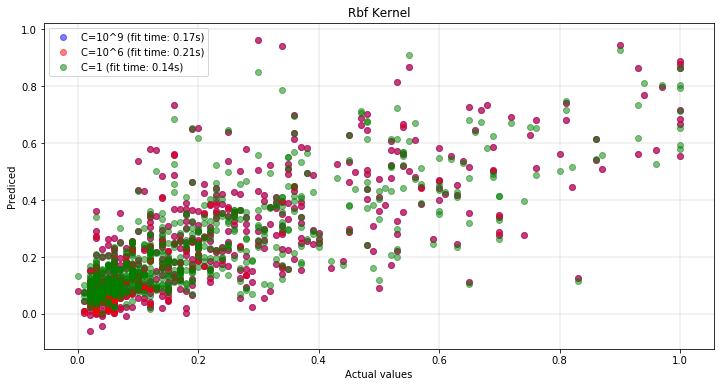

,C=10^9,C=10^6,C=1
Coefficient of determination,0.522498,0.522498,0.591845
Mean Squared Error,0.022701,0.022701,0.019404
Root Mean Squared Error,0.150669,0.150669,0.139300
Residual sum of squares,0.022701,0.022701,0.019404


In [40]:
#PCA
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
for key, value, color in svr_third:
    t0 = time.time()
    value.fit(X_train_pca, y_train)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_pca)
    results[key] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                    np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("Rbf Kernel")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()
results

SVR with rbf kernel performed better. The best result was obtained when C parameter was 1, coef. of determination = 0.59. 

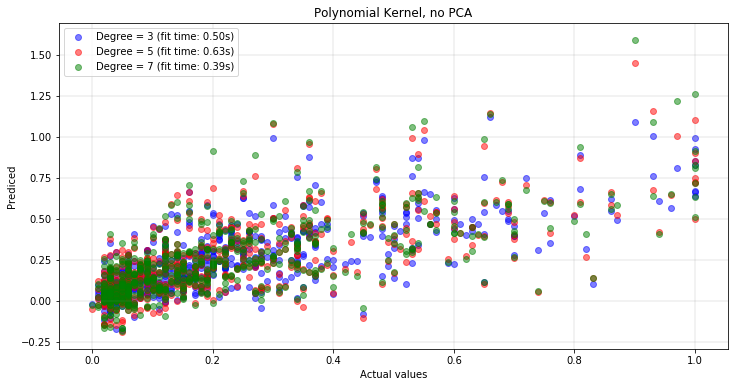

,Degree = 3,Degree = 5,Degree = 7
Coefficient of determination,0.489188,0.383640,0.355558
Mean Squared Error,0.024285,0.029303,0.030638
Root Mean Squared Error,0.155836,0.171181,0.175037
Residual sum of squares,0.024285,0.029303,0.030638


In [41]:
#X_train_rm_c

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
for key, value, color in svr_second:
    t0 = time.time()
    value.fit(X_train_rm_c, y_train_rm_c)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_rm_c)
    results[key] = [r2_score(y_test_rm_c, y_pred), mean_squared_error(y_test_rm_c, y_pred), 
                    np.sqrt(mean_squared_error(y_test_rm_c, y_pred)), np.mean((y_pred-y_test_rm_c)**2)]
    plt.scatter(y_test_rm_c, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("Polynomial Kernel, no PCA")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()
results


SVR with polynomial kernel worked better than with the pca split, but it is not yet satisfactory. The best value for coef. of determination is 0.48, when degree parameter is 3.

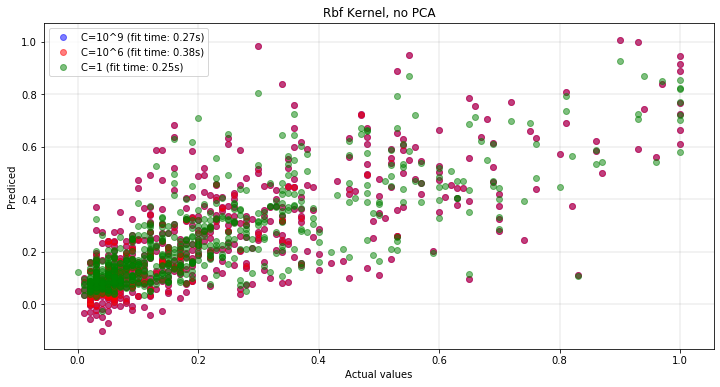

,C=10^9,C=10^6,C=1
Coefficient of determination,0.519184,0.519184,0.613433
Mean Squared Error,0.022859,0.022859,0.018378
Root Mean Squared Error,0.151191,0.151191,0.135566
Residual sum of squares,0.022859,0.022859,0.018378


In [42]:
#X_train_rm_c

plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
for key, value, color in svr_third:
    t0 = time.time()
    value.fit(X_train_rm_c, y_train_rm_c)
    elapsed_time = time.time() - t0

    y_pred = value.predict(X_test_rm_c)
    
    results[key] = [r2_score(y_test_rm_c, y_pred), mean_squared_error(y_test_rm_c, y_pred), 
                    np.sqrt(mean_squared_error(y_test_rm_c, y_pred)), np.mean((y_pred-y_test_rm_c)**2)]
    plt.scatter(y_test_rm_c, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("Rbf Kernel, no PCA")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()
results

SVR rbf kernel showed better result. The best result was obtained when C = 1, coef. of determination = 0.61 and RMSE = 0.13. This is also the best result for this algorithm from the both splits.

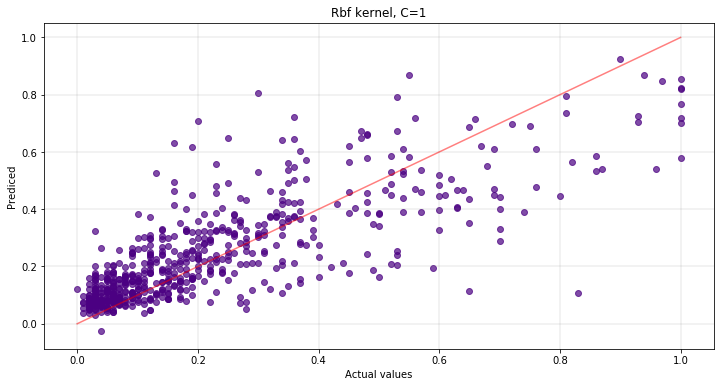

In [41]:
#best result obtained with svr_rbf3 = SVR(kernel='rbf', C=1), numeric features removed those highly correlated
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')

svr_rbf3 = SVR(kernel='rbf')

svr_rbf3.fit(X_train_rm_c, y_train_rm_c)
y_pred = svr_rbf3.predict(X_test_rm_c)
plt.scatter(y_test_rm_c, y_pred, alpha=0.7, c="indigo", label=key)
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.plot(0, 1, "black")
plt.plot([0, 1], [0,1], c='red', alpha=0.5)

plt.title("Rbf kernel, C=1")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()



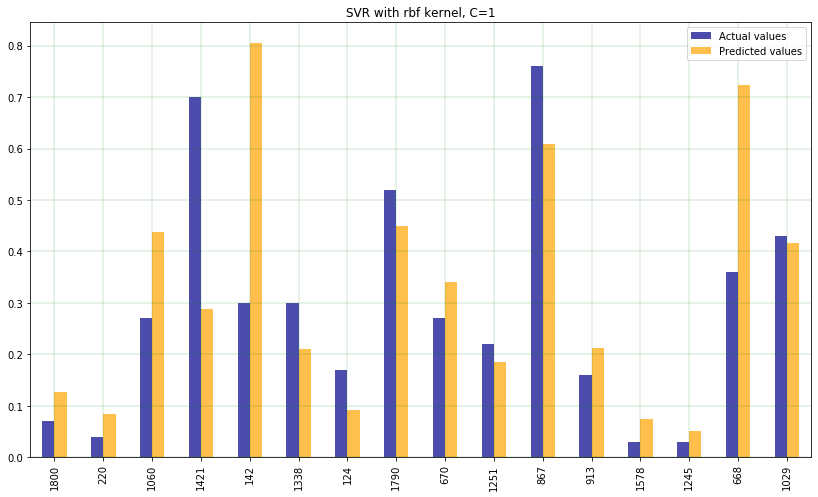

In [42]:
predicted_vs_actual = pd.DataFrame()
predicted_vs_actual["Actual values"] = y_test_rm_c
predicted_vs_actual["Predicted values"] = y_pred
predicted_vs_actual = predicted_vs_actual[30:46]
predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.7, color=["darkblue", "orange"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.title("SVR with rbf kernel, C=1")

plt.show()


Next we will test both splits of our data with Random Forest Regressor, experimenting with different values of n_estimators and max_depth.

==============================RandomForestRegressor==============================



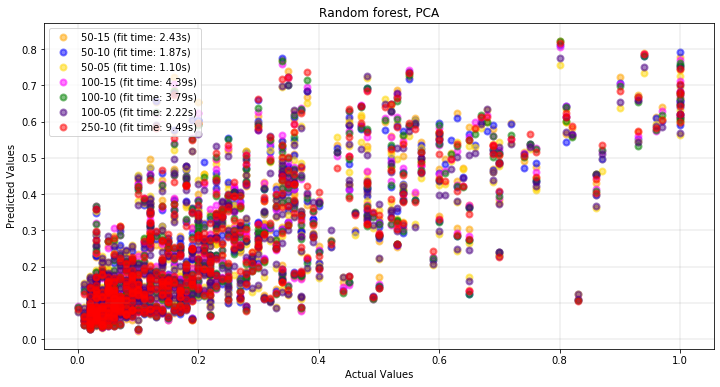

,50-15,50-10,50-05,100-15,100-10,100-05,250-10
Coefficient of determination,0.561517,0.558357,0.547901,0.570488,0.569398,0.554263,0.573996
Mean Squared Error,0.020846,0.020996,0.021494,0.020420,0.020472,0.021191,0.020253
Root Mean Squared Error,0.144382,0.144902,0.146607,0.142898,0.143079,0.145572,0.142313
Residual sum of squares,0.020846,0.020996,0.021494,0.020420,0.020472,0.021191,0.020253


In [43]:
#pca
randNum = 1234
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')

print("==============================RandomForestRegressor==============================\n")
estimators = [("50-15", RandomForestRegressor(n_estimators=50, max_depth=15, random_state=randNum)),
              ("50-10", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=randNum)),
              ("50-05", RandomForestRegressor(n_estimators=50, max_depth=5, random_state=randNum)),
              ("100-15", RandomForestRegressor(n_estimators=100, max_depth=15, random_state=randNum)),
              ("100-10", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=randNum)),
              ("100-05", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=randNum)),
              ("250-10", RandomForestRegressor(n_estimators=250, max_depth=10, random_state=randNum))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'50-15': 'orange','50-10': 'blue', '50-05': 'gold', '100-10': 'green', '100-05': 'indigo', '250-10': 'red', '250-05': 'purple', '100-15': 'magenta'}
lw = 2
array = []
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_pca, y_train)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_pca)
    results[name] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
    array+=[(name, mean_squared_error(y_test, y_pred))]
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Random forest, PCA")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results



In [ ]:

    t0 = time.time()
 
    elapsed_time = time.time() - t0
    plt.scatter(y_test, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))



The result using this data split are similar to one another, yet the best result in terms of accuracy is 250 n_estimators with max_depth 10, but since it takes more time, we could say that the best result is when we have 100 n_estimators and max_depth = 15.

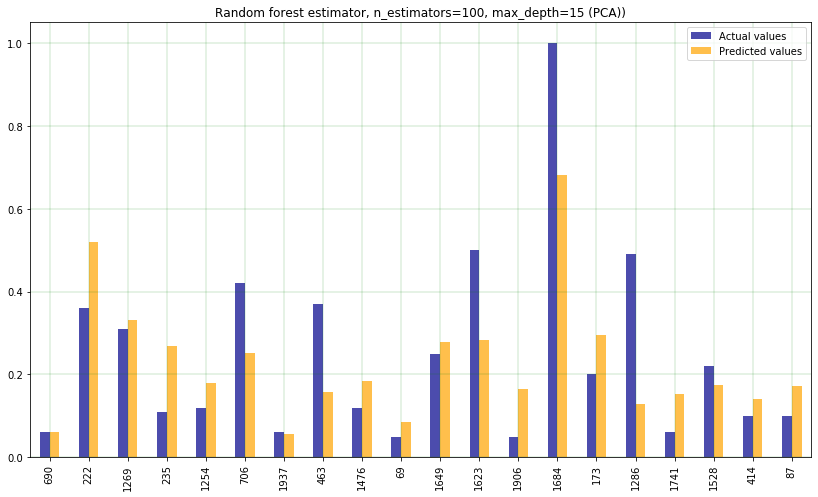

In [49]:
reg = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=randNum)

estimator.fit(X_train_pca, y_train)
y_pred = estimator.predict(X_test_pca)

predicted_vs_actual = pd.DataFrame()
predicted_vs_actual["Actual values"] = y_test
predicted_vs_actual["Predicted values"] = y_pred
predicted_vs_actual = predicted_vs_actual.head(20)
predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.7, color=["darkblue", "orange"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.title("Random forest estimator, n_estimators=100, max_depth=15 (PCA))")

plt.show()


==============================RandomForestRegressor==============================



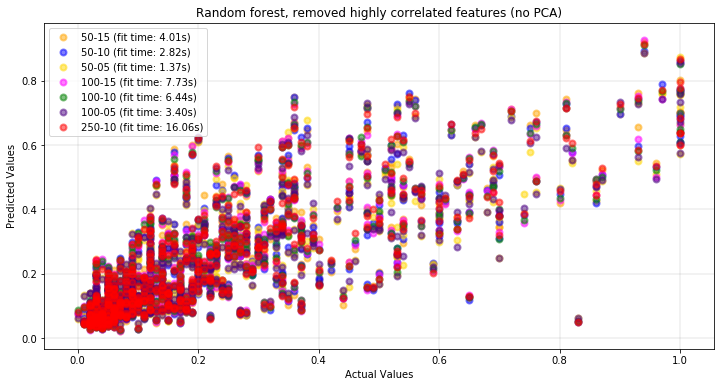

,50-15,50-10,50-05,100-15,100-10,100-05,250-10
Coefficient of determination,0.609167,0.608284,0.610002,0.611945,0.613457,0.610876,0.618122
Mean Squared Error,0.018581,0.018623,0.018541,0.018449,0.018377,0.018500,0.018155
Root Mean Squared Error,0.136312,0.136466,0.136166,0.135826,0.135561,0.136013,0.134741
Residual sum of squares,0.018581,0.018623,0.018541,0.018449,0.018377,0.018500,0.018155


In [36]:
randNum = 1234
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
#X_train_rm_c
print("==============================RandomForestRegressor==============================\n")
estimators = [("50-15", RandomForestRegressor(n_estimators=50, max_depth=15, random_state=randNum)),
              ("50-10", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=randNum)),
              ("50-05", RandomForestRegressor(n_estimators=50, max_depth=5, random_state=randNum)),
              ("100-15", RandomForestRegressor(n_estimators=100, max_depth=15, random_state=randNum)),
              ("100-10", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=randNum)),
              ("100-05", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=randNum)),
              ("250-10", RandomForestRegressor(n_estimators=250, max_depth=10, random_state=randNum))]
results = pd.DataFrame([], ['Coefficient of determination','Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'50-15': 'orange','50-10': 'blue', '50-05': 'gold', '100-10': 'green', '100-05': 'indigo', '250-10': 'red', '250-05': 'purple', '100-15': 'magenta'}
lw = 2
array = []
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_rm_c, y_train_rm_c)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_rm_c)
    results[name] = [r2_score(y_test_rm_c, y_pred), mean_squared_error(y_test_rm_c, y_pred), 
                     np.sqrt(mean_squared_error(y_test_rm_c, y_pred)), np.mean((y_pred-y_test_rm_c)**2)]
    plt.scatter(y_test_rm_c, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
    array+=[(name, mean_squared_error(y_test_rm_c, y_pred))]
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Random forest, removed highly correlated features (no PCA)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results



Random forest regressor with this data split has better results. The best result for this algorithm is using 250 n_estimators and max_depth = 10, but it also took more time than the others, so we could say that the algorithm with 100 n_estimator and max_depth of 10 was better in terms of performace and accuracy.

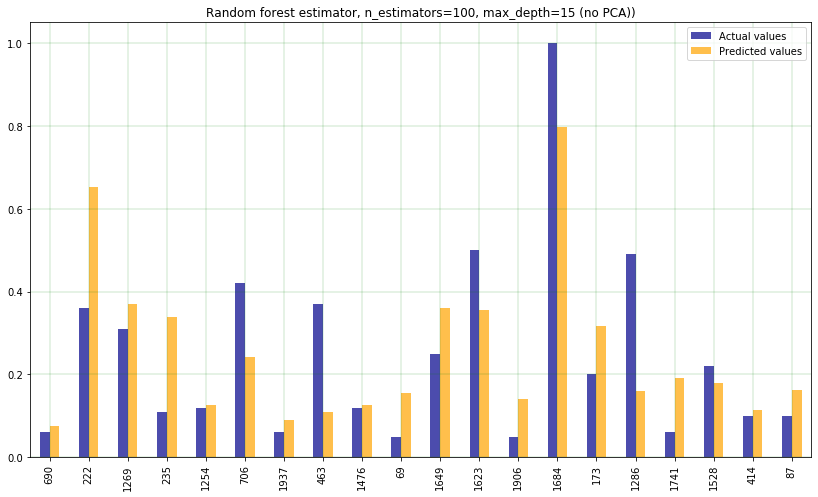

In [46]:
reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=randNum)

estimator.fit(X_train_rm_c, y_train_rm_c)
y_pred = estimator.predict(X_test_rm_c)

predicted_vs_actual = pd.DataFrame()
predicted_vs_actual["Actual values"] = y_test_rm_c
predicted_vs_actual["Predicted values"] = y_pred
predicted_vs_actual = predicted_vs_actual.head(20)
predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.7, color=["darkblue", "orange"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.title("Random forest estimator, n_estimators=100, max_depth=10 (no PCA))")

plt.show()


Next we will test huber regressor for both our data splits, using 4 different values of epsilon.

==============================Huber Regressor==============================

                                  1.35       1.5      1.75       1.9
Coefficient of determination  0.611297  0.612228  0.612001  0.610720
Mean Squared Error            0.018480  0.018435  0.018446  0.018507
Root Mean Squared Error       0.135940  0.135777  0.135817  0.136041
Residual sum of squares       0.018480  0.018435  0.018446  0.018507


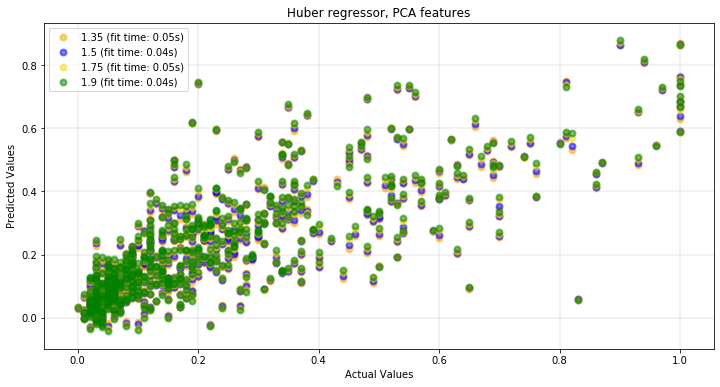

In [47]:
#HuberRegressor
#pca
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
print("==============================Huber Regressor==============================\n")
estimators = [("1.35", HuberRegressor(epsilon = 1.35, max_iter = 4000)),
              ("1.5", HuberRegressor(epsilon = 1.5, max_iter = 4000)),
              ("1.75", HuberRegressor(epsilon = 1.75, max_iter = 4000)),
              ("1.9", HuberRegressor(epsilon = 1.9, max_iter = 4000))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'1.35': 'orange','1.5': 'blue', '1.75': 'gold', '1.9': 'green'}
lw = 2
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_pca, y_train)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_pca)
    results[name] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                     np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
print(results)

plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Huber regressor, PCA features")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


The result are very similar, but the best result was with epsilon = 1.5, as we can see from the table above.

==============================Huber Regressor==============================

                                  1.35       1.5      1.75       1.9
Coefficient of determination  0.625278  0.626924  0.628263  0.628036
Mean Squared Error            0.017815  0.017737  0.017673  0.017684
Root Mean Squared Error       0.133473  0.133179  0.132940  0.132981
Residual sum of squares       0.017815  0.017737  0.017673  0.017684


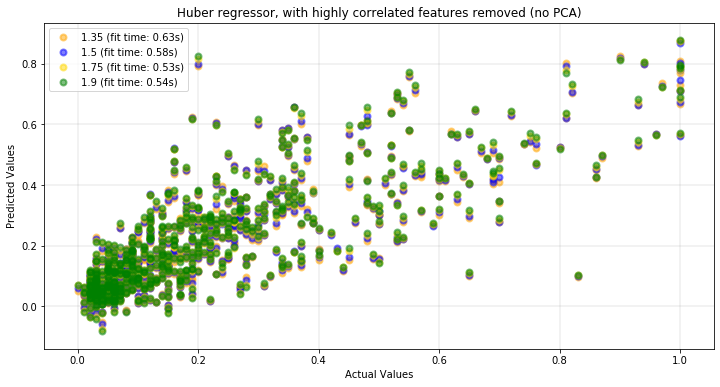

In [48]:
#HuberRegressor

#X_train_rm_c
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
print("==============================Huber Regressor==============================\n")
estimators = [("1.35", HuberRegressor(epsilon = 1.35, max_iter = 4000)),
              ("1.5", HuberRegressor(epsilon = 1.5, max_iter = 4000)),
              ("1.75", HuberRegressor(epsilon = 1.75, max_iter = 4000)),
              ("1.9", HuberRegressor(epsilon = 1.9, max_iter = 4000)),]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'1.35': 'orange','1.5': 'blue', '1.75': 'gold', '1.9': 'green'}
lw = 2
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_rm_c, y_train_rm_c)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_rm_c)
    results[name] = [r2_score(y_test_rm_c, y_pred), mean_squared_error(y_test_rm_c, y_pred), 
                     np.sqrt(mean_squared_error(y_test_rm_c, y_pred)), np.mean((y_pred-y_test_rm_c)**2)]
    plt.scatter(y_test_rm_c, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
print(results)

plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Huber regressor, with highly correlated features removed (no PCA)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

For this data split we have very similar results. The best one is when the epsilon parameter was 1.75. This was also the best result for both data splits and this algorithm.

The best result for the whole dataset from all the regression techniques was obtained using Huber Regression, with epsilon parameter 1.75. The coefficient of determination was 0.628 and RMSE = 0.13.